# CREDIT CARD FRAUD DETECTION

#### This project focuses on identifying fraudulent credit card transactions using machine learning models. The goal is to distinguish between legitimate and fraudulent transactions by analyzing patterns in transaction data and improving model performance for accuracy, precision, and recall.

# Data Analysis

In [1]:
import pandas as pd

In [2]:
data_train=pd.read_csv("fraudTrain.csv")
data_test=pd.read_csv("fraudTest.csv")
df=pd.concat([data_train, data_test])

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               i

In [6]:
print("Null values:")
print(df.isnull().sum())


Null values:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [7]:
df.duplicated().sum()

0

In [8]:
fraud=df[df["is_fraud"]==1]
not_fraud=df[df["is_fraud"]==0]
print(fraud.shape[0])
print(not_fraud.shape[0])


9651
1842743


# Data Preprocessing

## Feature Selection / Extraction

In [9]:
#Calculating age from date of birth
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
df['age'] = (pd.Timestamp.now() - df['dob']).dt.days // 365
df = df.drop(columns=['dob'])

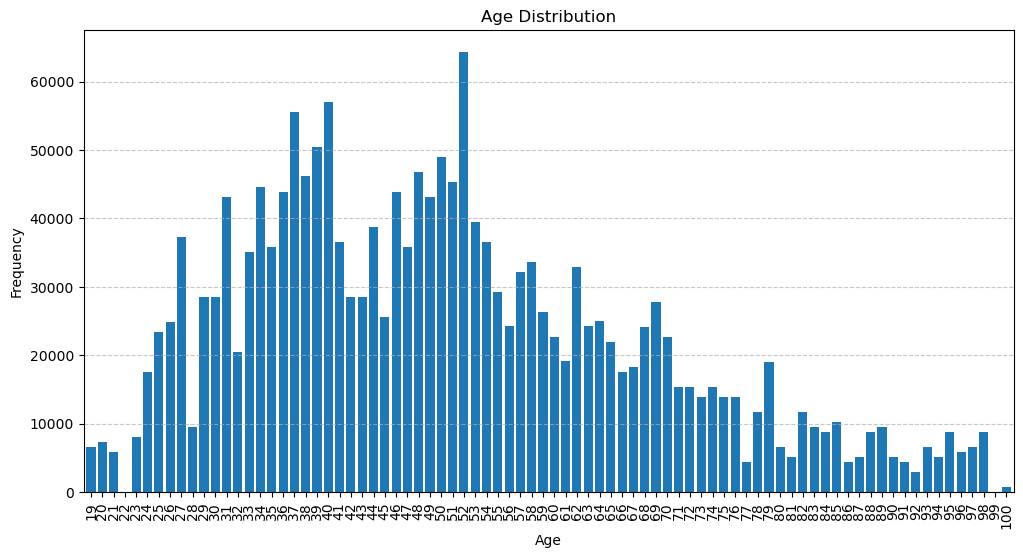

age
19     6586
20     7303
21     5833
22       12
23     8082
       ... 
96     5852
97     6601
98     8783
99       11
100     735
Name: count, Length: 82, dtype: int64


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

age_counts = df['age'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
age_counts.plot(kind='bar', width=0.8)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(age_counts)


In [11]:
# Extracting day, month, and hour from the datetime column to create new features

df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['transaction_day'] = df['trans_date_trans_time'].dt.day
df['transaction_month'] = df['trans_date_trans_time'].dt.month
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
df = df.drop(columns=['trans_date_trans_time'])

In [12]:
# This calculates the difference between each transaction's amount ('amt') and the average transaction amount within its respective 'category'.
# It helps to detect anomalies where the transaction deviates significantly from the category's usual transaction behavior.

df['amt_category_deviation'] = df['amt'] - df.groupby('category')['amt'].transform('mean')

In [13]:
# This computes the difference between the current transaction amount ('amt') and the previous transaction amount for each credit card number ('cc_num').

df['amt_diff_from_last'] = df.groupby('cc_num')['amt'].diff()

In [14]:
# This binary feature indicates whether the transaction occurred at night.
# Transactions between 12:00 AM - 6:00 AM (early morning) or after 10:00 PM 
# are labeled as 1 (night), otherwise 0 (not night).

df['is_night'] = df['transaction_hour'].apply(lambda x: 1 if x < 6 or x > 22 else 0)

In [15]:
# This feature calculates the average transaction amount ('amt') for each 'category' 
# and assigns it to all transactions within that category.

df['category_amt_interaction'] = df.groupby('category')['amt'].transform('mean')

In [16]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  

In [17]:
#Removing unnecessary features
drop_columns = ['Unnamed: 0','first', 'last','cc_num', 'trans_num',]
df = df.drop(columns=drop_columns)

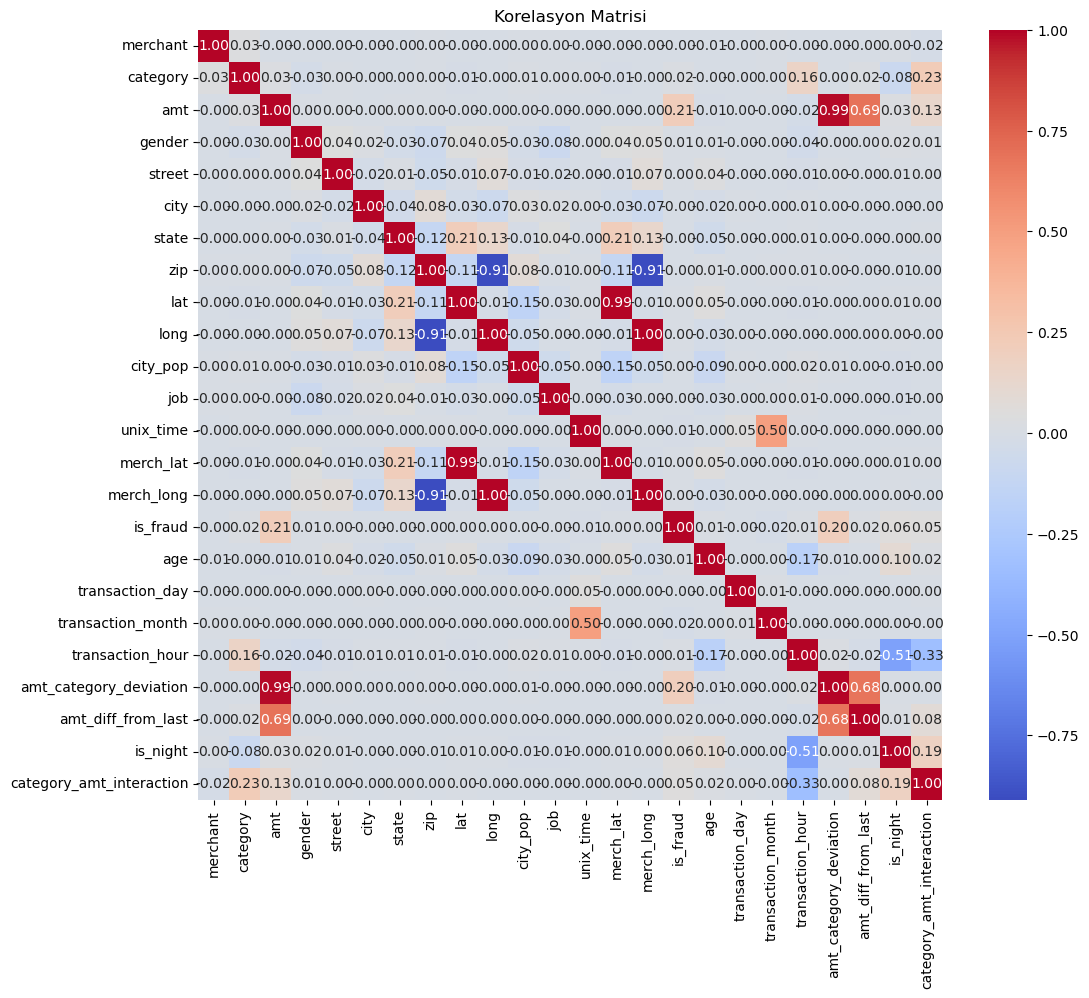

In [18]:
#Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

In [19]:
#Scaler
from sklearn.preprocessing import StandardScaler

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols.drop('is_fraud') 

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [20]:
from sklearn.model_selection import train_test_split
y = df['is_fraud']
X = df.drop(columns=['is_fraud'])

# Veri setini ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#Removing low importance columns
low_importance_cols = ['zip', 'lat', 'long', 'merchant', 'unix_time']
df = df.drop(columns=low_importance_cols)

# Model Training

In [22]:
from sklearn.model_selection import train_test_split

y = df['is_fraud']
X = df.drop(columns=['is_fraud'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#to store metrics
results = []


In [23]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred, average="macro")
rf_recall = recall_score(y_test, y_pred, average="macro")
rf_f1 = f1_score(y_test, y_pred, average="macro")
results.append(["Random Forest", rf_accuracy, rf_precision, rf_recall, rf_f1])

Accuracy: 0.9990363826289749
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.97      0.84      0.90      1953

    accuracy                           1.00    370479
   macro avg       0.99      0.92      0.95    370479
weighted avg       1.00      1.00      1.00    370479

Confusion Matrix:
 [[368481     45]
 [   312   1641]]


In [24]:
#XGBoost
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

xgb_model = xgb.XGBClassifier(eval_metric='logloss')

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_precision = precision_score(y_test, y_pred, average="macro")
xgb_recall = recall_score(y_test, y_pred, average="macro")
xgb_f1 = f1_score(y_test, y_pred, average="macro")
results.append(["XGBoost", xgb_accuracy, xgb_precision, xgb_recall, xgb_f1])

Accuracy: 0.9992928074195838

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.96      0.90      0.93      1930

    accuracy                           1.00    370479
   macro avg       0.98      0.95      0.96    370479
weighted avg       1.00      1.00      1.00    370479


Confusion Matrix:
[[368484     65]
 [   197   1733]]


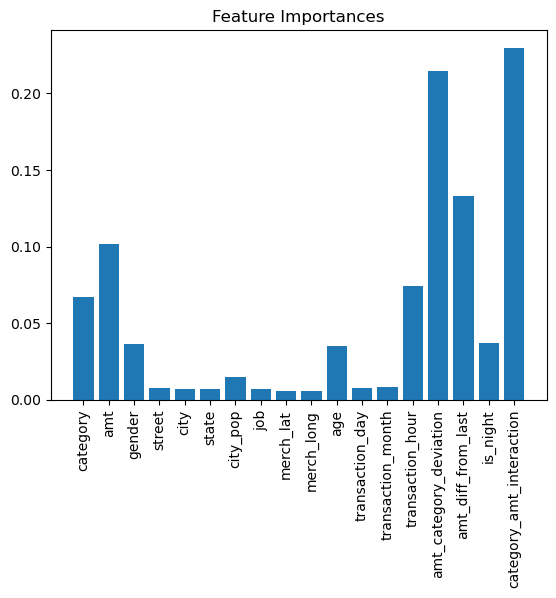

In [25]:
import matplotlib.pyplot as plt

feature_importances = xgb_model.feature_importances_
plt.bar(X_train.columns, feature_importances)
plt.xticks(rotation=90)
plt.title("Feature Importances")
plt.show()

In [26]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

X = df.drop(columns=['is_fraud']) 
y = df['is_fraud'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)
y_proba_tree = decision_tree_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

dt_accuracy = accuracy_score(y_test, y_pred_tree)
dt_precision = precision_score(y_test, y_pred_tree, average="macro")
dt_recall = recall_score(y_test, y_pred_tree, average="macro")
dt_f1 = f1_score(y_test, y_pred_tree, average="macro")

results.append(["Decision Tree", dt_accuracy, dt_precision, dt_recall, dt_f1])

Accuracy: 0.9899238553332308
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.85      0.88      0.86      1953

    accuracy                           1.00    370479
   macro avg       0.93      0.94      0.93    370479
weighted avg       1.00      1.00      1.00    370479



# Model Comparison

In [34]:
import pandas as pd

columns = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"]
results_df = pd.DataFrame(results, columns=columns)

results_df[["Accuracy", "Precision", "Recall", "F1-Score"]] = results_df[["Accuracy", "Precision", "Recall", "F1-Score"]].round(2)

styled_table = results_df.style.set_caption("Model Performance Comparison") \
                               .background_gradient(cmap="YlGnBu", subset=["Accuracy", "Precision", "Recall", "F1-Score"]) \
                               .format("{:.2f}", subset=["Accuracy", "Precision", "Recall", "F1-Score"]) \
                               .set_properties(**{"text-align": "center"}) \
                               .set_table_styles([
                                   {'selector': 'caption',
                                    'props': [('font-size', '14px'), ('font-weight', 'bold'), ('color', '#2f4f4f')]}
                               ])

from IPython.display import display
display(styled_table)


,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,1.00,0.97,0.84,0.90
1,XGBoost,1.00,0.96,0.90,0.93
2,Decision Tree,1.00,0.85,0.88,0.86
